In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
preprocess_model = pickle.load(open('preprocess_model.pkl','rb'))

Restoring data from pickel file to variable

In [3]:
x_train = preprocess_model[0]
y_train = preprocess_model[1]
x_test = preprocess_model[2]
y_test = preprocess_model[3]

# Applying logistic regression

In [4]:
logistic = LogisticRegression()

In [5]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [6]:
logi_pred = logistic.predict(x_test)

test accuracy

In [7]:
logi_accu = accuracy_score(y_test,logi_pred)

In [8]:
logi_accu

0.8332328712075547

roc_auc score

In [9]:
roc_auc_score(y_test,logi_pred)

0.7282070017837572

Now applying gridsearchcv for hyperparameter tuning

In [10]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [11]:
params = {'solver':['newton_cg','lbfgs','liblinear','sag','saga']}

In [12]:
grid = GridSearchCV(estimator=logistic,param_grid=params,cv=10,n_jobs=-1,verbose=True)

In [13]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [14]:
grid.best_estimator_

LogisticRegression()

In [15]:
grid.best_score_

0.8254065480768759

Now applying best parameter in logistic regression

In [16]:
log_model = LogisticRegression(solver='sag')

In [17]:
log_model.fit(x_train,y_train)

LogisticRegression(solver='sag')

In [18]:
log_model_pred = log_model.predict(x_test)

accuracy

In [19]:
accuracy_score(y_test,log_model_pred)

0.8332328712075547

roc_auc score

In [20]:
roc_auc_score(y_test,log_model_pred)

0.7282070017837572

confusion matrix

In [21]:
confusion = confusion_matrix(y_test,log_model_pred)

In [22]:
tp = confusion[0][0]
tn = confusion[1][1]
fp = confusion[0][1]
fn = confusion[1][0]


In [23]:
precision = tp/(tp+fp)

In [24]:
precision

0.9349766822118588

In [25]:
Recall = tp/(tp+fn)

In [26]:
Recall

0.8568811820735133

In [27]:
pred=[]
#for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
for model in [log_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8752013697687318


In [28]:
fpr , tpr  , thresholds = roc_curve(y_test,final_prediction)
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.90583888e-03, 1.89910597e-03, 5.46960750e-04])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
665,0.502925,0.833735
659,0.507225,0.833635
660,0.506887,0.833635
658,0.507801,0.833635
657,0.508234,0.833534


In [30]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

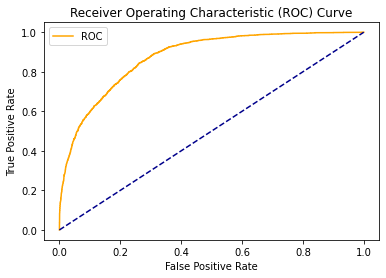

In [31]:
plot_roc_curve(fpr,tpr)

# Applying support vector classifier

In [32]:
svc = SVC()

In [33]:
svc.fit(x_train,y_train)

SVC()

In [34]:
svc_pred = svc.predict(x_test)

Accuracy

In [35]:
accuracy = accuracy_score(y_test,svc_pred)

In [36]:
accuracy

0.8465943339361061

confusion matrix

In [37]:
confusion = confusion_matrix(y_test,svc_pred)

In [38]:
tp = confusion[0][0]
tn = confusion[1][1]
fp = confusion[0][1]
fn = confusion[1][0]

In [39]:
precision = tp/(tp+fp)

In [40]:
precision

0.9467021985343105

In [41]:
Recall = tp/(tp+fn)

In [42]:
Recall

0.8630952380952381